Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
job_pred = pd.read_csv('aug_train.csv',index_col=0)

In [3]:
print(job_pred.head())

                 city  city_development_index gender      relevent_experience  \
enrollee_id                                                                     
8949         city_103                   0.920   Male  Has relevent experience   
29725         city_40                   0.776   Male   No relevent experience   
11561         city_21                   0.624    NaN   No relevent experience   
33241        city_115                   0.789    NaN   No relevent experience   
666          city_162                   0.767   Male  Has relevent experience   

            enrolled_university education_level major_discipline experience  \
enrollee_id                                                                   
8949              no_enrollment        Graduate             STEM        >20   
29725             no_enrollment        Graduate             STEM         15   
11561          Full time course        Graduate             STEM          5   
33241                       NaN      

In [4]:
job_pred.info() #Checking the info about columns and it's object type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


Check the Null values

In [5]:
job_pred.columns[job_pred.isna().any()].tolist() #to check the columns that has missing values

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [6]:
print("Number of Categories in: ") # to Print the number of categories in each column 
for ColName in job_pred[['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']]:
    print("{} = {}".format(ColName,len(job_pred[ColName].unique())))

Number of Categories in: 
gender = 4
enrolled_university = 4
education_level = 6
major_discipline = 7
experience = 23
company_size = 9
company_type = 7
last_new_job = 7


Step : TO handle null values. We will use mode function to replace the null values

In [7]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [8]:
for Columns in ['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']:
    impute_nan_most_frequent_category(job_pred,Columns)
    
# Display imputed result
job_pred[['gender','gender_Imputed',
 'enrolled_university','enrolled_university_Imputed',
 'education_level','education_level_Imputed',
 'major_discipline','major_discipline_Imputed',
 'experience','experience_Imputed',
 'company_size','company_size_Imputed',
 'company_type','company_type_Imputed',
 'last_new_job','last_new_job_Imputed']].head(10)

,gender,gender_Imputed,enrolled_university,enrolled_university_Imputed,education_level,education_level_Imputed,major_discipline,major_discipline_Imputed,experience,experience_Imputed,company_size,company_size_Imputed,company_type,company_type_Imputed,last_new_job,last_new_job_Imputed
enrollee_id,,,,,,,,,,,,,,,,
8949,Male,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,>20,>20,NaN,50-99,NaN,Pvt Ltd,1,1
29725,Male,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,15,15,50-99,50-99,Pvt Ltd,Pvt Ltd,>4,>4
11561,NaN,Male,Full time course,Full time course,Graduate,Graduate,STEM,STEM,5,5,NaN,50-99,NaN,Pvt Ltd,never,never
33241,NaN,Male,NaN,no_enrollment,Graduate,Graduate,Business Degree,Business Degree,<1,<1,NaN,50-99,Pvt Ltd,Pvt Ltd,never,never
666,Male,Male,no_enrollment,no_enrollment,Masters,Masters,STEM,STEM,>20,>20,50-99,50-99,Funded Startup,Funded Startup,4,4
21651,NaN,Male,Part time course,Part time course,Graduate,Graduate,STEM,STEM,11,11,NaN,50-99,NaN,Pvt Ltd,1,1
28806,Male,Male,no_enrollment,no_enrollment,High School,High School,NaN,STEM,5,5,50-99,50-99,Funded Startup,Funded Startup,1,1
402,Male,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,13,13,<10,<10,Pvt Ltd,Pvt Ltd,>4,>4
27107,Male,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,7,7,50-99,50-99,Pvt Ltd,Pvt Ltd,1,1


We will drop the old columns

In [9]:
job_pred = job_pred.drop(['city','city_development_index','gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job'], axis = 1)

In [10]:
job_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   relevent_experience          19158 non-null  object 
 1   training_hours               19158 non-null  int64  
 2   target                       19158 non-null  float64
 3   gender_Imputed               19158 non-null  object 
 4   enrolled_university_Imputed  19158 non-null  object 
 5   education_level_Imputed      19158 non-null  object 
 6   major_discipline_Imputed     19158 non-null  object 
 7   experience_Imputed           19158 non-null  object 
 8   company_size_Imputed         19158 non-null  object 
 9   company_type_Imputed         19158 non-null  object 
 10  last_new_job_Imputed         19158 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.8+ MB


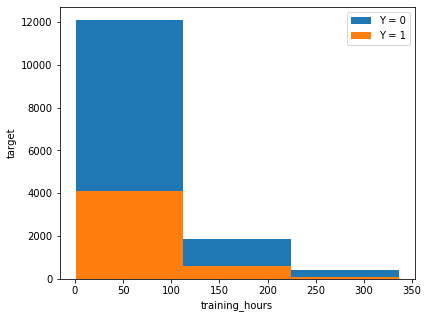

In [11]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(job_pred['training_hours'][job_pred['target'] == 0], bins=3, label = 'Y = 0')
plt.hist(job_pred['training_hours'][job_pred['target'] == 1], bins=3, label = 'Y = 1')
plt.ylabel('target')
plt.xlabel('training_hours')
plt.legend()

Plotting the categorical values

In [12]:
categorical_features=[feature for feature in job_pred.columns if ((job_pred[feature].dtypes=='O') & (feature not in ['target']))]
categorical_features

['relevent_experience',
 'gender_Imputed',
 'enrolled_university_Imputed',
 'education_level_Imputed',
 'major_discipline_Imputed',
 'experience_Imputed',
 'company_size_Imputed',
 'company_type_Imputed',
 'last_new_job_Imputed']

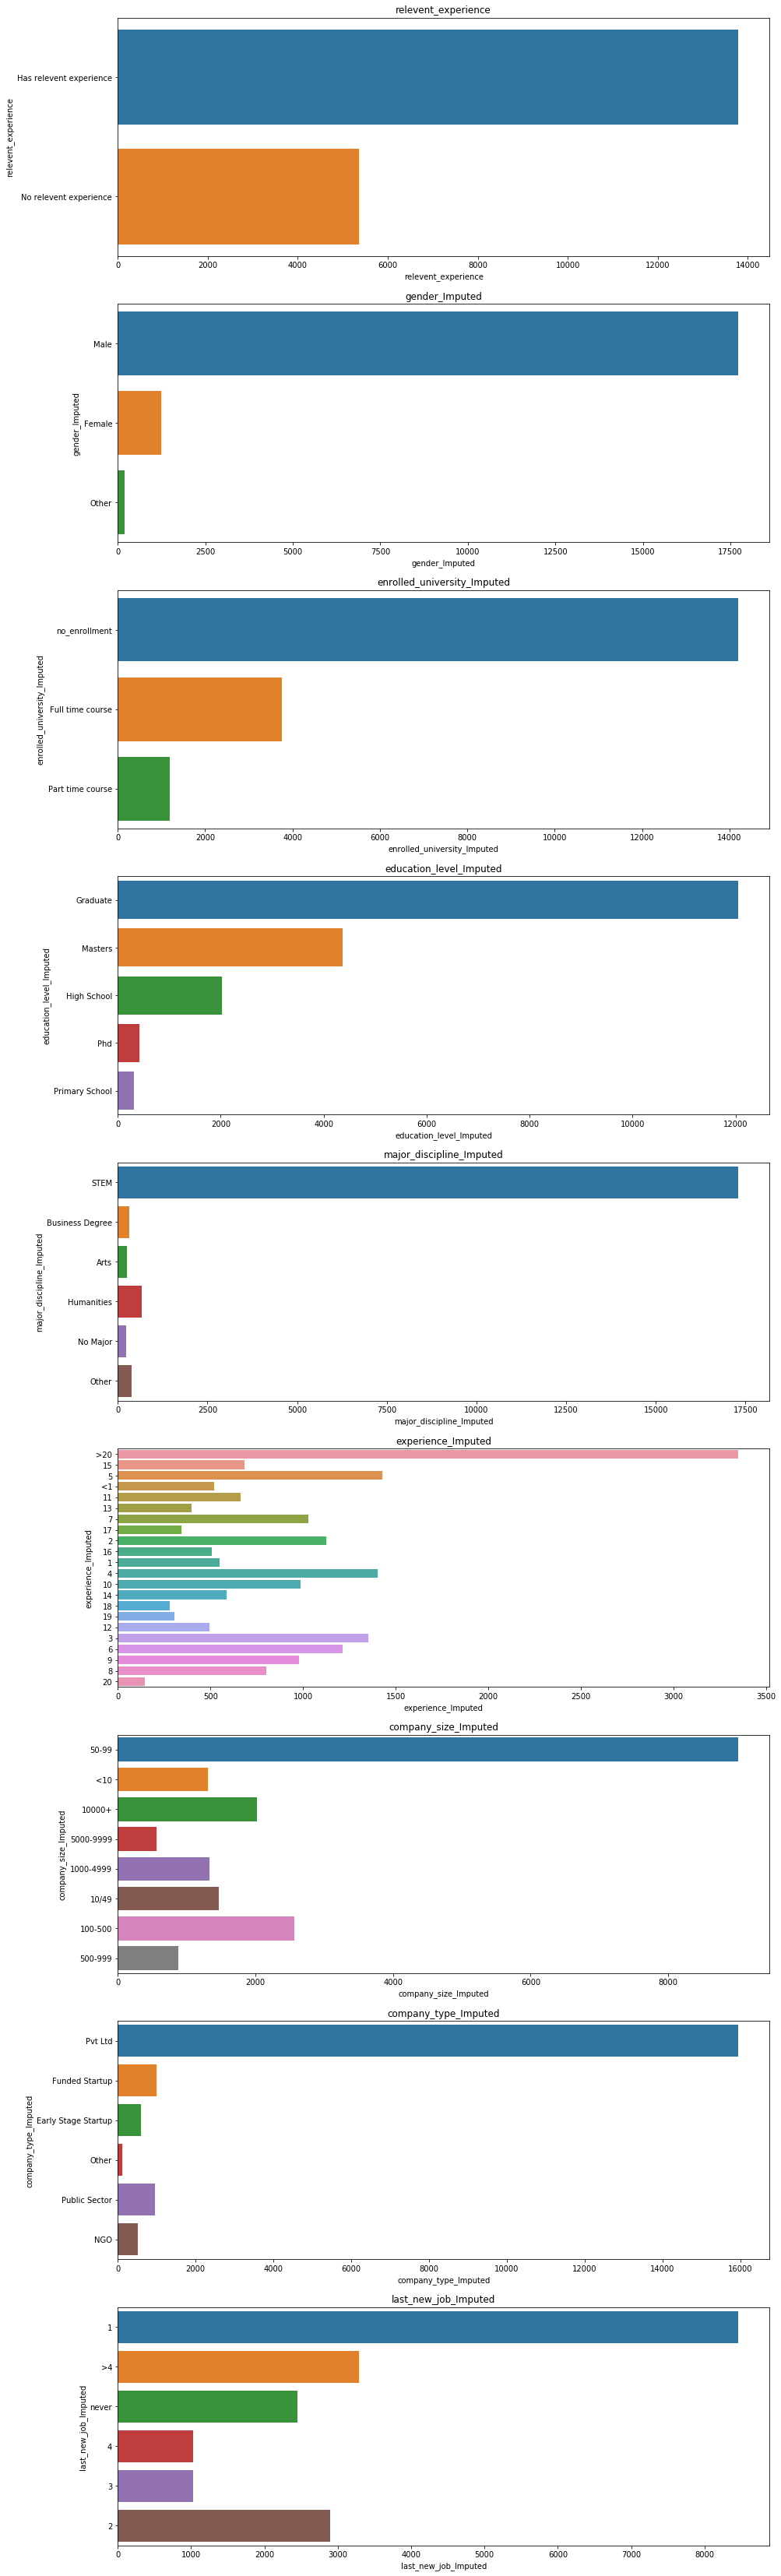

In [13]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,1,plotnumber)
    sns.countplot(y=categorical_feature,data=job_pred)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

/opt/anaconda3/envs/TOPICM/lib/python3.8/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


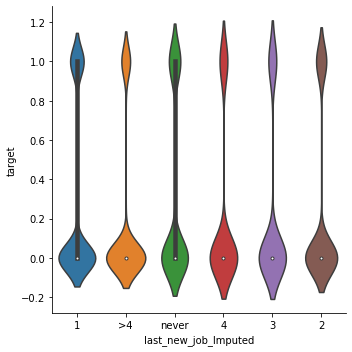

In [14]:
sns.factorplot(x = "last_new_job_Imputed", y = "target", kind = 'violin',data = job_pred)

In [15]:
job_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   relevent_experience          19158 non-null  object 
 1   training_hours               19158 non-null  int64  
 2   target                       19158 non-null  float64
 3   gender_Imputed               19158 non-null  object 
 4   enrolled_university_Imputed  19158 non-null  object 
 5   education_level_Imputed      19158 non-null  object 
 6   major_discipline_Imputed     19158 non-null  object 
 7   experience_Imputed           19158 non-null  object 
 8   company_size_Imputed         19158 non-null  object 
 9   company_type_Imputed         19158 non-null  object 
 10  last_new_job_Imputed         19158 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.4+ MB


In [16]:
for col in list(job_pred):
    print(col)
    print(job_pred[col].unique())

relevent_experience
['Has relevent experience' 'No relevent experience']
training_hours
[ 36  47  83  52   8  24  18  46 123  32 108  23  26 106   7 132  68  50
  48  65  13  22 148  72  40 141  82 145 206 152  42  14 112  87  20  21
  92 102  43  45  19  90  25  15  98 142  28 228  29  12  17  35   4 136
  27  74  86  75 332 140 182 172  33  34 150 160   3   2 210 101  59 260
 131 109  70  51  60 164 290 133  76 156 120 100  39  55  49   6 125 326
 198  11  41 114 246  81  31  84 105  38 178 104 202  88 218  62  10  80
  77  37 162 190  30  16   5  54  44 110 262 107 134 103  96  57 240  94
 113  56  64 320   9 129  58 126 166  95  97 204 116 161 146 302  53 143
 124 214 288 306 322  67  61 130 220  78 314 226 280  91 234 163 151  85
 256 168 144  66 128  73 122 154  63 292 188  71 135 138 184  89 157 118
 111 192 127 216 139 196  99 167 276 121  69 155 316 242 304 284 278 310
 222 212 250 180 258 330 158 149 165  79 194 176 174 312 200 328 300 153
 232 336 308 147 298 224 254 248 236

Steps to handle categorical values

In [18]:
pd.options.mode.chained_assignment = None 

In [19]:
job_pred['last_new_job_Imputed'].loc[(job_pred['last_new_job_Imputed'] == 'never')] = '0'
job_pred['last_new_job_Imputed'].loc[(job_pred['last_new_job_Imputed'] == '>4')] = '5'

Function to define the one hot encoding

In [20]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)


In [21]:
job_pred= encode_and_bind(job_pred, 'gender_Imputed') #Applied one_hot encoding for Gender and relevant experience
job_pred= encode_and_bind(job_pred, 'relevent_experience')
job_pred= encode_and_bind(job_pred,'enrolled_university_Imputed')

In [22]:
job_pred

,relevent_experience,training_hours,target,gender_Imputed,enrolled_university_Imputed,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,,,,,
8949,Has relevent experience,36,1.0,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,0,1,0,1,0,0,0,1
29725,No relevent experience,47,0.0,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,0,1,0,0,1,0,0,1
11561,No relevent experience,83,0.0,Male,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,0,1,0,0,1,1,0,0
33241,No relevent experience,52,1.0,Male,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1
666,Has relevent experience,8,0.0,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,No relevent experience,42,1.0,Male,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,0,1,0,0,1,0,0,1
31398,Has relevent experience,52,1.0,Male,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,0,1,0,1,0,0,0,1
24576,Has relevent experience,44,0.0,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,0,1,0,1,0,0,0,1


In [23]:
job_pred=job_pred.drop(['gender_Imputed','relevent_experience','enrolled_university_Imputed'], axis=1)


In [24]:
job_pred

,training_hours,target,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,,
8949,36,1.0,Graduate,STEM,>20,50-99,Pvt Ltd,1,0,1,0,1,0,0,0,1
29725,47,0.0,Graduate,STEM,15,50-99,Pvt Ltd,5,0,1,0,0,1,0,0,1
11561,83,0.0,Graduate,STEM,5,50-99,Pvt Ltd,0,0,1,0,0,1,1,0,0
33241,52,1.0,Graduate,Business Degree,<1,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1
666,8,0.0,Masters,STEM,>20,50-99,Funded Startup,4,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,42,1.0,Graduate,Humanities,14,50-99,Pvt Ltd,1,0,1,0,0,1,0,0,1
31398,52,1.0,Graduate,STEM,14,50-99,Pvt Ltd,4,0,1,0,1,0,0,0,1
24576,44,0.0,Graduate,STEM,>20,50-99,Pvt Ltd,4,0,1,0,1,0,0,0,1


In [25]:
from sklearn.preprocessing import LabelEncoder
job_pred['education_level_Imputed'] = LabelEncoder().fit_transform(job_pred.education_level_Imputed)
job_pred

,training_hours,target,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,,
8949,36,1.0,0,STEM,>20,50-99,Pvt Ltd,1,0,1,0,1,0,0,0,1
29725,47,0.0,0,STEM,15,50-99,Pvt Ltd,5,0,1,0,0,1,0,0,1
11561,83,0.0,0,STEM,5,50-99,Pvt Ltd,0,0,1,0,0,1,1,0,0
33241,52,1.0,0,Business Degree,<1,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1
666,8,0.0,2,STEM,>20,50-99,Funded Startup,4,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,42,1.0,0,Humanities,14,50-99,Pvt Ltd,1,0,1,0,0,1,0,0,1
31398,52,1.0,0,STEM,14,50-99,Pvt Ltd,4,0,1,0,1,0,0,0,1
24576,44,0.0,0,STEM,>20,50-99,Pvt Ltd,4,0,1,0,1,0,0,0,1


In [26]:
job_pred.shape

(19158, 16)

Frequency encoding to handle high cardinal dimensionality

In [27]:
# create the dictionary
frq_encode_discipline = job_pred['major_discipline_Imputed'].value_counts().to_dict()
frq_encode_company_type = job_pred['company_type_Imputed'].value_counts().to_dict()
frq_encode_company_size= job_pred['company_size_Imputed'].value_counts().to_dict()
frq_encode_experience = job_pred['experience_Imputed'].value_counts().to_dict()

# Map the column with dictionary
job_pred['major_discipline_Imputed'] = job_pred['major_discipline_Imputed'].map(frq_encode_discipline)
job_pred['company_type_Imputed'] = job_pred['company_type_Imputed'].map(frq_encode_company_type)
job_pred['company_size_Imputed'] = job_pred['company_size_Imputed'].map(frq_encode_company_size)
job_pred['experience_Imputed'] = job_pred['experience_Imputed'].map(frq_encode_experience)
job_pred.head()

,training_hours,target,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,,
8949,36,1.0,0,17305,3351,9021,15957,1,0,1,0,1,0,0,0,1
29725,47,0.0,0,17305,686,9021,15957,5,0,1,0,0,1,0,0,1
11561,83,0.0,0,17305,1430,9021,15957,0,0,1,0,0,1,1,0,0
33241,52,1.0,0,327,522,9021,15957,0,0,1,0,0,1,0,0,1
666,8,0.0,2,17305,3351,9021,1001,4,0,1,0,1,0,0,0,1


In [28]:
job_pred.shape

(19158, 16)

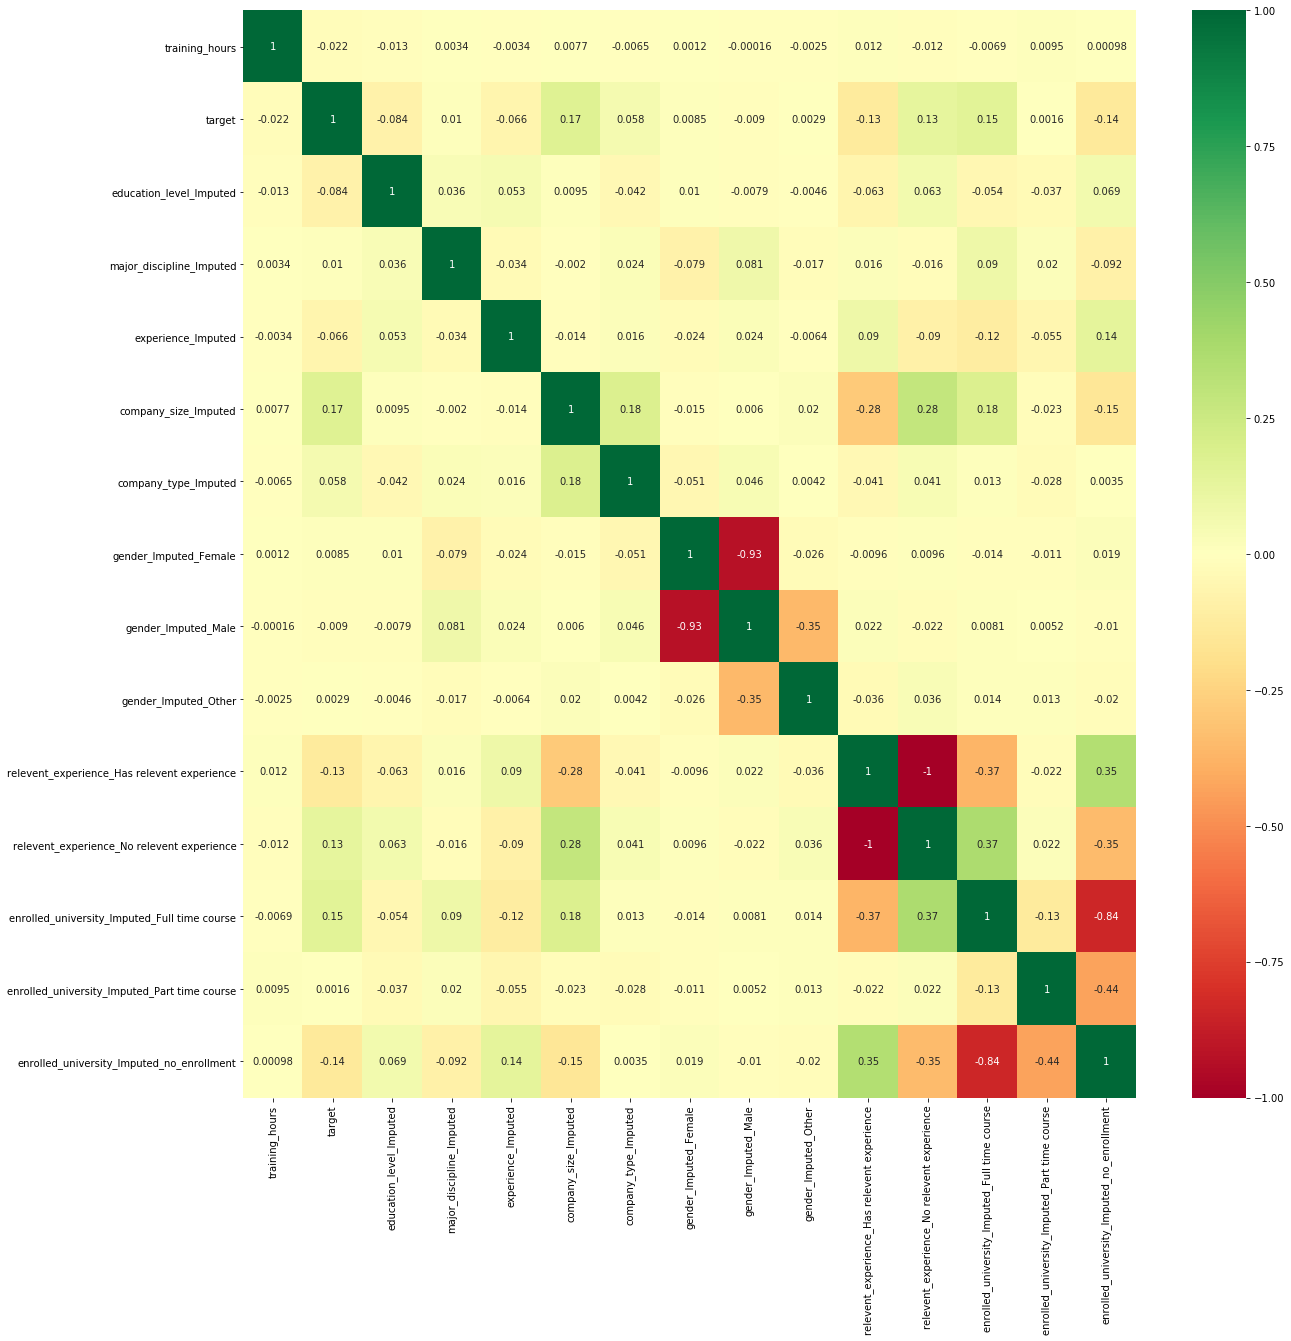

In [29]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = job_pred.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(job_pred[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = job_pred.loc[:, job_pred.columns != 'target'] #Independent columns
y=job_pred.loc[:,job_pred.columns =='target']   #target columns



In [31]:
X.shape

(19158, 15)

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

[0.48917529 0.0486116  0.02347259 0.21039612 0.08384821 0.02915996
 0.07296158 0.00349202 0.00367009 0.00164369 0.00610136 0.00506705
 0.00993038 0.002628   0.00984206]


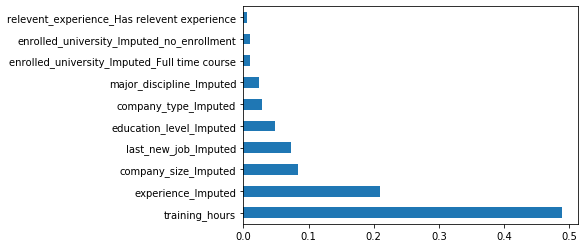

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,np.ravel(y))
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Test dataset

In [33]:
test_data = pd.read_csv('aug_test.csv',index_col=0)
test_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [36]:
#Preprocessing

print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 32403 to 12215
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  1621 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2098 non-null   object 
 5   education_level         2077 non-null   object 
 6   major_discipline        1817 non-null   object 
 7   experience              2124 non-null   object 
 8   company_size            1507 non-null   object 
 9   company_type            1495 non-null   object 
 10  last_new_job            2089 non-null   object 
 11  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 216.2+ KB
None


In [38]:
test_data.columns[test_data.isna().any()].tolist()

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [40]:
print("Number of Categories in: ") # to Print the number of categories in each column 
for ColName in test_data[['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']]:
    print("{} = {}".format(ColName,len(test_data[ColName].unique())))

Number of Categories in: 
gender = 4
enrolled_university = 4
education_level = 6
major_discipline = 7
experience = 23
company_size = 9
company_type = 7
last_new_job = 7


In [41]:
for Columns in ['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']:
    impute_nan_most_frequent_category(test_data,Columns)
    
# Display imputed result
test_data[['gender','gender_Imputed',
 'enrolled_university','enrolled_university_Imputed',
 'education_level','education_level_Imputed',
 'major_discipline','major_discipline_Imputed',
 'experience','experience_Imputed',
 'company_size','company_size_Imputed',
 'company_type','company_type_Imputed',
 'last_new_job','last_new_job_Imputed']].head(10)

,gender,gender_Imputed,enrolled_university,enrolled_university_Imputed,education_level,education_level_Imputed,major_discipline,major_discipline_Imputed,experience,experience_Imputed,company_size,company_size_Imputed,company_type,company_type_Imputed,last_new_job,last_new_job_Imputed
enrollee_id,,,,,,,,,,,,,,,,
32403,Male,Male,Full time course,Full time course,Graduate,Graduate,STEM,STEM,9,9,<10,<10,NaN,Pvt Ltd,1,1
9858,Female,Female,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,5,5,NaN,50-99,Pvt Ltd,Pvt Ltd,1,1
31806,Male,Male,no_enrollment,no_enrollment,High School,High School,NaN,STEM,<1,<1,NaN,50-99,Pvt Ltd,Pvt Ltd,never,never
27385,Male,Male,no_enrollment,no_enrollment,Masters,Masters,STEM,STEM,11,11,10/49,10/49,Pvt Ltd,Pvt Ltd,1,1
27724,Male,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,>20,>20,10000+,10000+,Pvt Ltd,Pvt Ltd,>4,>4
217,Male,Male,Part time course,Part time course,Masters,Masters,STEM,STEM,10,10,NaN,50-99,NaN,Pvt Ltd,2,2
21465,NaN,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,<1,<1,100-500,100-500,Pvt Ltd,Pvt Ltd,1,1
27302,Female,Female,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,>20,>20,NaN,50-99,NaN,Pvt Ltd,>4,>4
12994,Male,Male,no_enrollment,no_enrollment,Graduate,Graduate,STEM,STEM,14,14,NaN,50-99,NaN,Pvt Ltd,4,4


In [42]:
test_data = test_data.drop(['city','city_development_index','gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job'], axis = 1)

In [43]:
test_data

,relevent_experience,training_hours,gender_Imputed,enrolled_university_Imputed,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed
enrollee_id,,,,,,,,,,
32403,Has relevent experience,21,Male,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1
9858,Has relevent experience,98,Female,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1
31806,No relevent experience,15,Male,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never
27385,Has relevent experience,39,Male,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1
27724,Has relevent experience,72,Male,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4
...,...,...,...,...,...,...,...,...,...,...
1289,No relevent experience,15,Male,no_enrollment,Graduate,Humanities,16,50-99,Public Sector,4
195,Has relevent experience,30,Male,no_enrollment,Masters,STEM,18,50-99,Pvt Ltd,2
31762,No relevent experience,18,Male,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,never


In [44]:
for col in list(test_data):
    print(col)
    print(test_data[col].unique())

relevent_experience
['Has relevent experience' 'No relevent experience']
training_hours
[ 21  98  15  39  72  12  11  81   2   4 196  51  48 134  10 125  31  23
 110  74  44  33  19  65  46  78 105  29  43  18   8 145  22   9  20 130
   3  49 270  35  87  37 158 114  40  91  14 132 124  80 188 182 282  84
  59 116  34  64  77  56  73  30  66 100  32  28  99  41 258 144 328  47
  36  55   5  58   7  42  95  17  54  50 135  27  24 120  61 139 154  96
  76 156 102  88  13 101 178 200  68  70  16 152 138 128 204  53  52  67
 118 272  26 174  71 202  60  82 194 248 119  85  86  38 212  57 107 103
 109 150  25  62  89 112 167  45 106  92 163 108  90  83 322 166 148 168
 104 234 127  75 113 332 288 170  63 220 250 222 136 160 226 141  94 190
 206 266 334 304 172 284 180   6 122 214 111 292  97 184 218 176 129  79
  69 151 324 146 232   1 140 280 123 254 264 246 310 155 298 216 260 192
 224 228 121 306 210 276 256 244 312 131 314 157 149 290 147 300 133 165
 117 262 126 330 162 316 142]
gender

In [46]:
test_data['last_new_job_Imputed'].loc[(test_data['last_new_job_Imputed'] == 'never')] = 0
test_data['last_new_job_Imputed'].loc[(test_data['last_new_job_Imputed'] == '>4')] = 5

In [47]:
test_data= encode_and_bind(test_data, 'gender_Imputed') #Applied one_hot encoding for Gender and relevant experience
test_data= encode_and_bind(test_data, 'relevent_experience')
test_data= encode_and_bind(test_data,'enrolled_university_Imputed')

In [48]:
test_data

,relevent_experience,training_hours,gender_Imputed,enrolled_university_Imputed,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,,,,
32403,Has relevent experience,21,Male,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,0,1,0,1,0,1,0,0
9858,Has relevent experience,98,Female,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,1,0,0,1,0,0,0,1
31806,No relevent experience,15,Male,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1
27385,Has relevent experience,39,Male,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,0,1,0,1,0,0,0,1
27724,Has relevent experience,72,Male,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,5,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,No relevent experience,15,Male,no_enrollment,Graduate,Humanities,16,50-99,Public Sector,4,0,1,0,0,1,0,0,1
195,Has relevent experience,30,Male,no_enrollment,Masters,STEM,18,50-99,Pvt Ltd,2,0,1,0,1,0,0,0,1
31762,No relevent experience,18,Male,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1


In [49]:
test_data=test_data.drop(['gender_Imputed','relevent_experience','enrolled_university_Imputed'], axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder
test_data['education_level_Imputed'] = LabelEncoder().fit_transform(test_data.education_level_Imputed)
test_data

,training_hours,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,
32403,21,0,STEM,9,<10,Pvt Ltd,1,0,1,0,1,0,1,0,0
9858,98,0,STEM,5,50-99,Pvt Ltd,1,1,0,0,1,0,0,0,1
31806,15,1,STEM,<1,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1
27385,39,2,STEM,11,10/49,Pvt Ltd,1,0,1,0,1,0,0,0,1
27724,72,0,STEM,>20,10000+,Pvt Ltd,5,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,15,0,Humanities,16,50-99,Public Sector,4,0,1,0,0,1,0,0,1
195,30,2,STEM,18,50-99,Pvt Ltd,2,0,1,0,1,0,0,0,1
31762,18,4,STEM,3,50-99,Pvt Ltd,0,0,1,0,0,1,0,0,1


In [51]:
test_data.shape

(2129, 15)

In [53]:
# create the dictionary
frq_encode_discipline = test_data['major_discipline_Imputed'].value_counts().to_dict()
frq_encode_company_type = test_data['company_type_Imputed'].value_counts().to_dict()
frq_encode_company_size= test_data['company_size_Imputed'].value_counts().to_dict()
frq_encode_experience = test_data['experience_Imputed'].value_counts().to_dict()

# Map the column with dictionary
test_data['major_discipline_Imputed'] = test_data['major_discipline_Imputed'].map(frq_encode_discipline)
test_data['company_type_Imputed'] = test_data['company_type_Imputed'].map(frq_encode_company_type)
test_data['company_size_Imputed'] = test_data['company_size_Imputed'].map(frq_encode_company_size)
test_data['experience_Imputed'] = test_data['experience_Imputed'].map(frq_encode_experience)
test_data.head()

,training_hours,education_level_Imputed,major_discipline_Imputed,experience_Imputed,company_size_Imputed,company_type_Imputed,last_new_job_Imputed,gender_Imputed_Female,gender_Imputed_Male,gender_Imputed_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Imputed_Full time course,enrolled_university_Imputed_Part time course,enrolled_university_Imputed_no_enrollment
enrollee_id,,,,,,,,,,,,,,,
32403,21,0,1933,113,163,1775,1,0,1,0,1,0,1,0,0
9858,98,0,1933,163,960,1775,1,1,0,0,1,0,0,0,1
31806,15,1,1933,74,960,1775,0,0,1,0,0,1,0,0,1
27385,39,2,1933,86,172,1775,1,0,1,0,1,0,0,0,1
27724,72,0,1933,388,217,1775,5,0,1,0,1,0,0,0,1


In [ ]:
new_job_pred= job_pred[['training_hours','company_size_Imputed','last_new_job_Imputed','education_level_Imputed',
                       'company_type_Imputed','major_discipline_Imputed','target']]

In [ ]:
new_job_pred

In [55]:
X = job_pred.loc[:, job_pred.columns != 'target']
y = job_pred.loc[:, job_pred.columns == 'target']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [72]:
logreg.score(X_train, y_train)

0.751402844838836

In [73]:
logreg.score(X_test, y_test)

0.7455636743215032

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2845    7]
 [ 968   12]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85      2852
         1.0       0.63      0.01      0.02       980

    accuracy                           0.75      3832
   macro avg       0.69      0.50      0.44      3832
weighted avg       0.72      0.75      0.64      3832



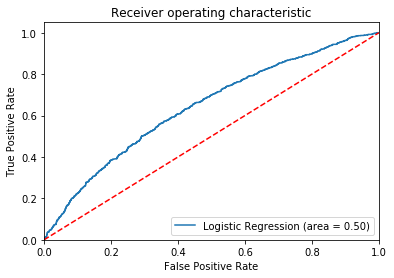

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [84]:
import pickle
pickle.dump(logreg, open('model.pkl','wb'))

In [85]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))